<a href="https://colab.research.google.com/github/fwairynah/LE1_Magboo_LC/blob/main/LE1_Magboo_LC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [215]:
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [124]:
airfoil = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/airfoil.csv'))

In [125]:
airfoil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   attack angle                         1503 non-null   float64
 2   chord length                         1503 non-null   float64
 3   free stream velocity                 1503 non-null   float64
 4   suction side displacement thickness  1503 non-null   float64
 5   scaled sound pressure                1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [115]:
airfoil.head()

,frequency,attack angle,chord length,free stream velocity,suction side displacement thickness,scaled sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [116]:
airfoil.shape

(1503, 6)

In [117]:
airfoil.drop_duplicates(inplace= True)

In [118]:
airfoil.shape

(1503, 6)

In [119]:
airfoil.isnull().sum()*100/airfoil.shape[0]

frequency                              0.0
attack angle                           0.0
chord length                           0.0
free stream velocity                   0.0
suction side displacement thickness    0.0
scaled sound pressure                  0.0
dtype: float64

In [120]:
airfoil.columns

Index(['frequency', 'attack angle', 'chord length', 'free stream velocity',
       'suction side displacement thickness', 'scaled sound pressure'],
      dtype='object')

In [121]:
X = airfoil[['frequency', 'attack angle', 'chord length', 'free stream velocity', 'suction side displacement thickness']]
y = airfoil ['scaled sound pressure']

print(X, y)

      frequency  attack angle  chord length  free stream velocity  \
0           800           0.0        0.3048                  71.3   
1          1000           0.0        0.3048                  71.3   
2          1250           0.0        0.3048                  71.3   
3          1600           0.0        0.3048                  71.3   
4          2000           0.0        0.3048                  71.3   
...         ...           ...           ...                   ...   
1498       2500          15.6        0.1016                  39.6   
1499       3150          15.6        0.1016                  39.6   
1500       4000          15.6        0.1016                  39.6   
1501       5000          15.6        0.1016                  39.6   
1502       6300          15.6        0.1016                  39.6   

      suction side displacement thickness  
0                                0.002663  
1                                0.002663  
2                                0.0026

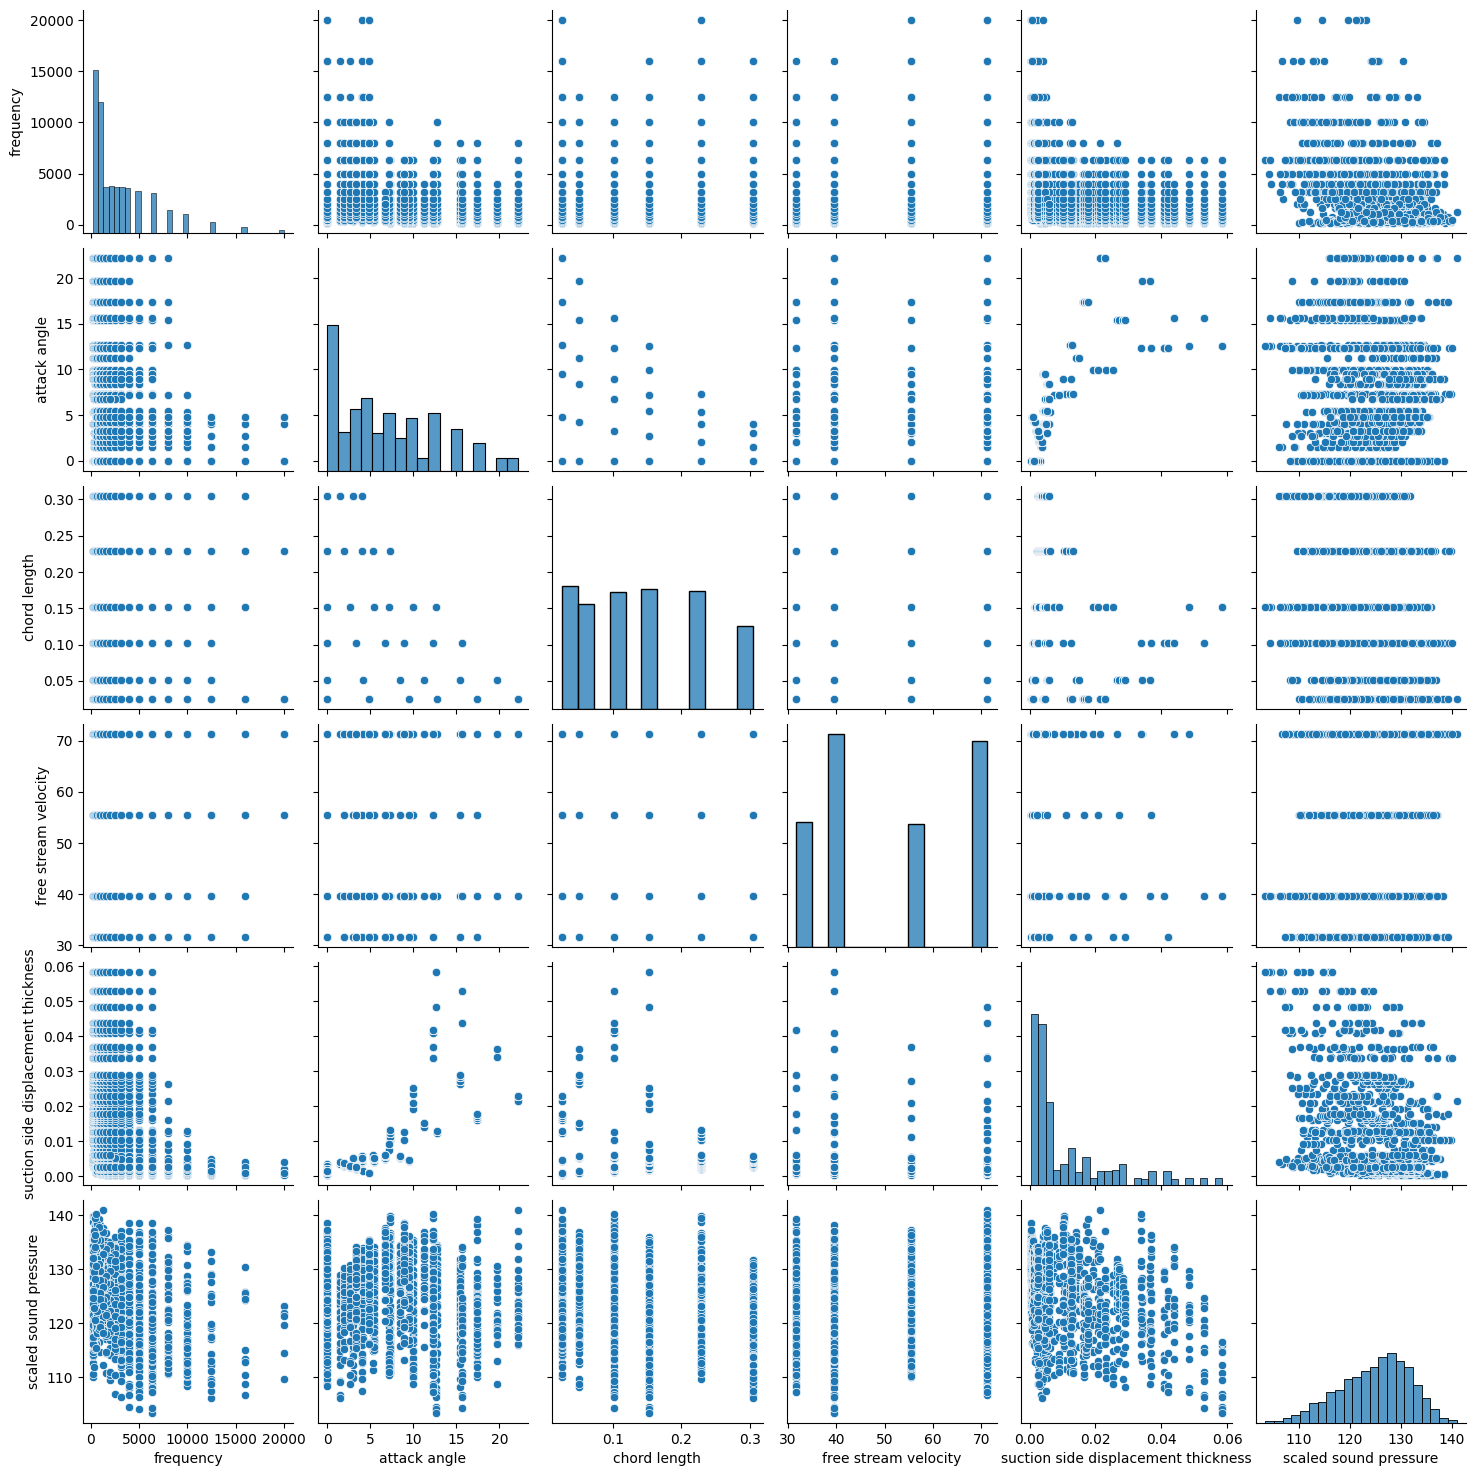

In [122]:
sns.pairplot(airfoil)

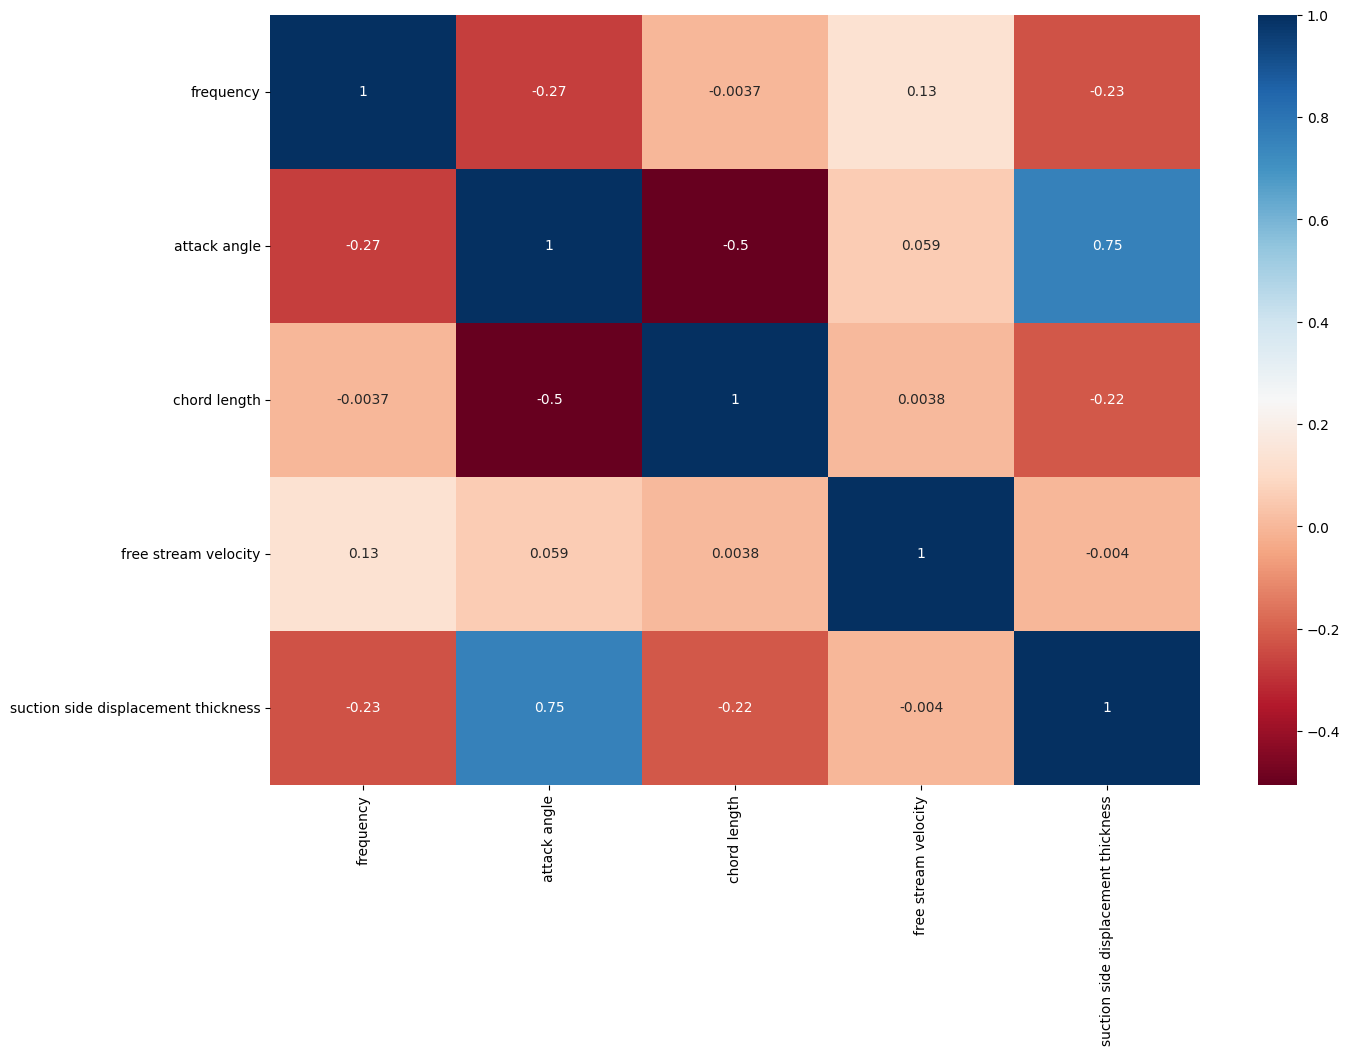

In [108]:
columns = ['frequency', 'attack angle', 'chord length', 'free stream velocity', 'suction side displacement thickness']

airfoil_selected = airfoil[columns]
plt.figure(figsize = (15, 10))
sns.heatmap(airfoil_selected.corr(), annot = True, cmap="RdBu")
plt.show()

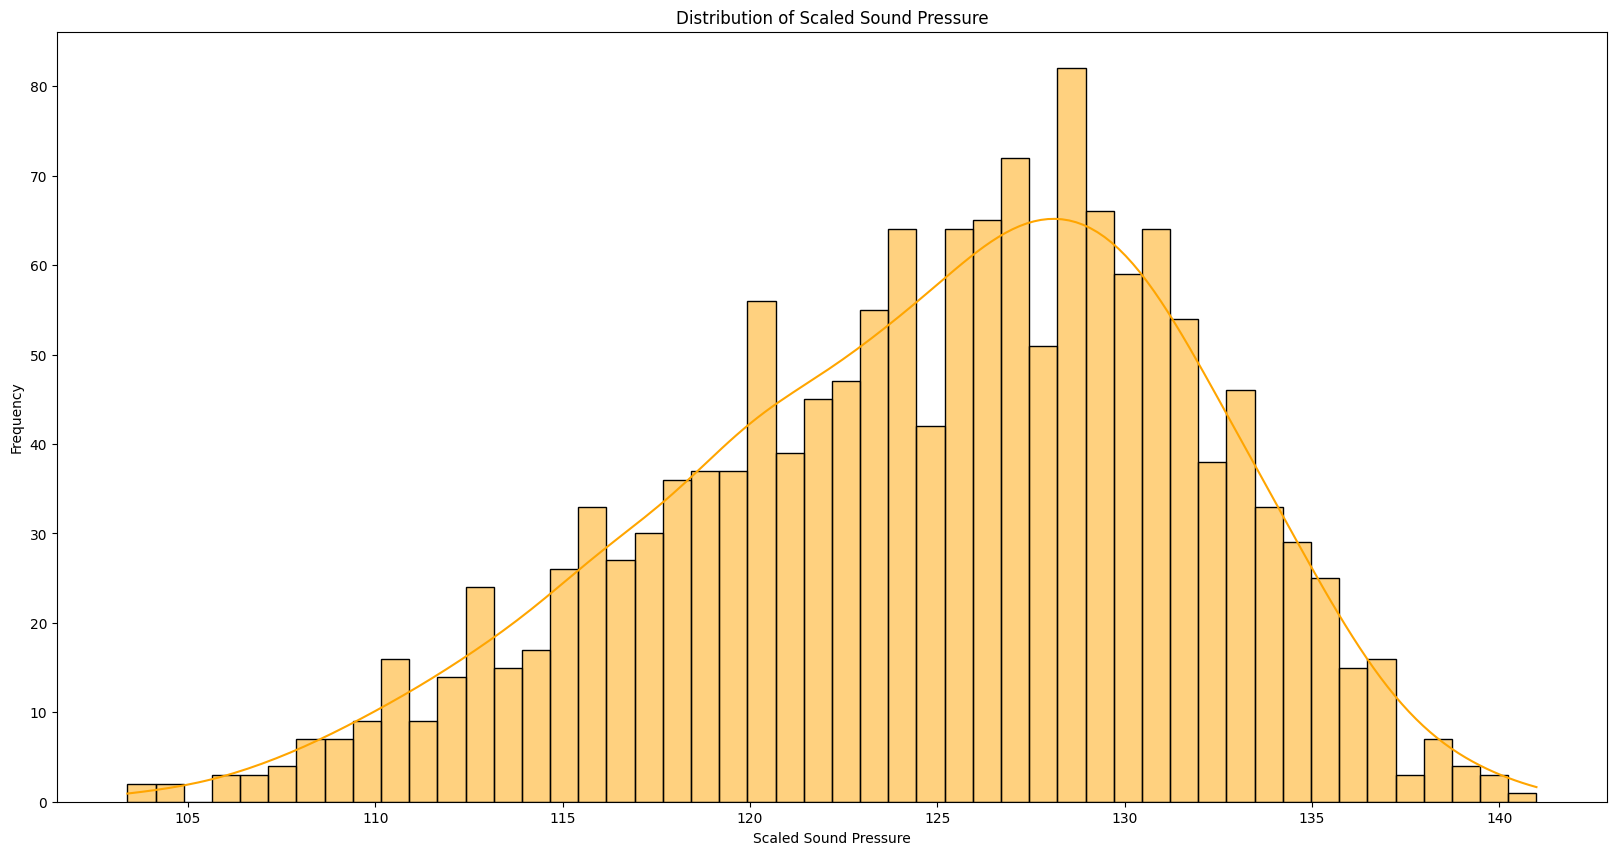

In [205]:
plt.figure(figsize=(20, 10))
sns.histplot(airfoil['scaled sound pressure'], bins=50, kde= True, color='orange')
plt.title('Distribution of Scaled Sound Pressure')
plt.xlabel('Scaled Sound Pressure')
plt.ylabel('Frequency')
plt.show()

# Linear Regression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [208]:
linreg_model = LinearRegression()
scaler = StandardScaler()

linreg_pipeline = make_pipeline(
    scaler,
    linreg_model
)

linreg_pipeline.fit(X_train, y_train)
results = linreg_pipeline.score(X_test, y_test)
y_pred = linreg_pipeline.predict(X_test)

In [216]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test,y_pred))

MAE: 3.6724145641788004
MSE: 22.128643318247274
RMSE: 4.704109194974887
R2: 0.5582979754897286


In [144]:
joblib.dump(linreg_pipeline, '/content/drive/MyDrive/Colab Notebooks/linreg_model.pckl')
loaded_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/linreg_model.pckl')
print(linreg_pipeline.score(X_test, y_test))

0.5582979754897286


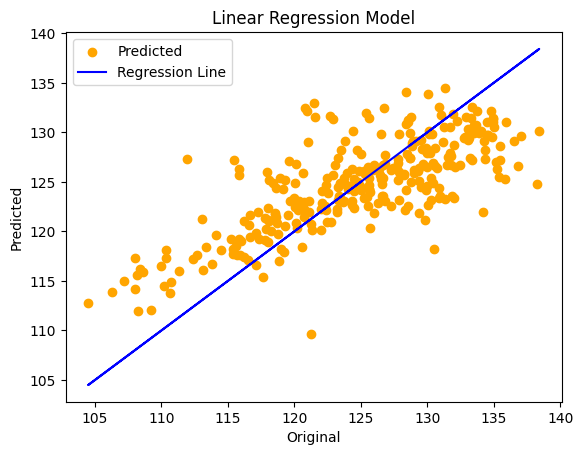

In [210]:
plt.scatter(y_test, y_pred, color='orange', label='Predicted')
plt.plot(y_test, y_test, color='blue', label='Regression Line')
plt.title('Linear Regression Model')
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.legend()

plt.show()